# Genetic algorithm
### Carl Fredrik Berg, NTNU, 2023

In this section we will consider the <i>genetic</i> algorithm. This is an optimization algorithm inspired by natural selection, thereby its name. It is an evolutionary algorithm, iteratively updating individuals in a population to converge towards an optimal solution. The individuals are then solution candidates which are ranked according to the fitness of their solution. The individuals in the population will be evolved at each iteration using operations such as mutation, cross-over and selection.

Th evolution typically starts from by generating a population of randomly generated individuals. Along with the nature inspired names, each iteration is often called a generation. For each generation the fitness of each individual is assessed. The fitness function evaluating the individuals can be of different forms, but is often merely the objective function to be optimized. The algorithm terminates when the best solution candidate have a fitness above a certain pre-described cut-off value, or if the number of iterations are above a pre-described maximum number of iterations.

Let $f \colon \mathbb{R}^n \to \mathbb{R}$ be the function we want to optimize (in our case, maximize). Let $P$ be the population, with $\vec{p}_i$ being the best known position for particle $i \in I$ and $\vec{g}$ being the best known position of the full population. A psedu-code for the algorithm is as follows:

1. <i>Initialization:</i> Initialize your population of individuals with a set of genes $\vec{x}_i$, where the subscript $i$ represents individual $i \in P$ in the population $P$. The initial population can be distributed randomly or by any other sampling method (e.g., the Latin hypercube sampling). We also rank our solutions according to their fitness, in our case we rank them then according to their values $f(\vec{x}_i)$.
2. <i>Selection:</i> One might keep the best individuals, to ensure that the best value do not deteriorate. One can also add small noise to a subset of the best individuals, as this will improve the local search. This is particularly important late in the search when one is close to the optimal point.
3. <i>Mutation:</i> With a small probability, let part of the individual genes mutate. This is important to ensure variation in the gene-pool, needed to explore wider. Without mutation, one easily merge towards the current local optima.
4. <i>Cross-over:</i> Merge genes from parents, where parents are picked based on their fitness. There are several ways of picking parents, e.g., competition. In the following we pick parents with a probability relative to their fitness.
5. <i> Convergence:</i> Repeat step 2 to 4 until a fixed number of steps or until the improvement in the best solution start to converge.

There are a range of factors to tune this genetic algorithm. There are also a range of different ways of setting up the algorithm, e.g., you do not need to include all the steps above.

Below we have implement the genetic algorithm in python.


1 [1.         0.28373133 0.2841093 ] 0.39990159563398325 -2.5006151786282618
2 [1.         0.28211979 0.28954265] 0.48291651399159014 -2.0707513017817707
3 [1.         0.28300283 0.34880341] 3.26105717549841 -0.3066490239770675
4 [1.         0.29066578 0.35258675] 4.961896999784609 -0.20153582390835784
5 [1.         0.29532722 0.35096171] 6.56960098649108 -0.15221624601802713
6 [1.         0.29532722 0.35096171] 6.56960098649108 -0.15221624601802713
7 [1.         0.29675233 0.35696595] 7.1671632513327 -0.13952521589543182
8 [1.         0.30241622 0.35323651] 9.838180692467098 -0.10164480926495692
9 [1.         0.30703727 0.35955206] 15.818568304491826 -0.0632168462247017
10 [1.         0.3101639  0.36416175] 21.838955726350548 -0.045789735211258994
11 [1.         0.3101639  0.36416175] 21.838955726350548 -0.045789735211258994
12 [1.         0.31272628 0.36262193] 26.55810558270471 -0.03765328806627023
13 [1.         0.31657353 0.36919227] 46.035436654277035 -0.02172239632502959
14 [1. 

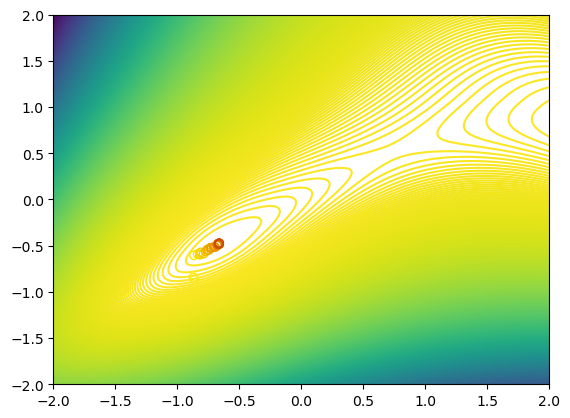

In [12]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

cmap = plt.get_cmap('gnuplot')


def hObjectiveFunction(fx,fy):
    return -np.abs((3 - fx)*fx-3*fy+1.0)**(7.0/3.0)-np.abs((3-fy)*fy-fx+1.0)**(7.0/3.0)

afBounds=np.array([[-2.0,2.0],[-2.0,2.0]])
def hScalingFunction(fx,fy):
    #return (fx-afBounds[0,0])/(afBounds[0,1]-afBounds[0,0]),(fy-afBounds[1,0])/(afBounds[1,1]-afBounds[1,0])
    return afBounds[0,0]+fx*(afBounds[0,1]-afBounds[0,0]),afBounds[1,0]+fy*(afBounds[1,1]-afBounds[1,0])


def hFitnessFunction(fx,fy):
    return -1.0/hObjectiveFunction(hScalingFunction(fx,fy)[0],hScalingFunction(fx,fy)[1])



fDelta = 0.025
aafy, aafx = np.mgrid[slice(-2.0, 2.0 + fDelta, fDelta),slice(-2.0, 2.0 + fDelta, fDelta)]
plt.contour(aafx, aafy, hObjectiveFunction(aafx,aafy),1000)#, cmap=cm.Purples_r)

def plotBest(fx,fy,iIteration):
    plt.scatter(hScalingFunction(fx,fy)[0],hScalingFunction(fx,fy)[1],facecolors='none', edgecolors=cmap(1.0-iIteration/iMaxIt),)
    return None

#Set population size
iPopNum=10
#Set size of selection
iSelection=4
#Set propability of mutation
fMutProp=0.1
#Set noise
fNoise=0.02

#Set convergence criteria
iMaxIt=100
fMaxFitness=1E5
fCurFitness=0

#Initialize population
aaPopulation=np.random.uniform(0.0,1.0,(iPopNum,2))
aRankedPopulation=aaPopulation

iteration=0
while iteration<iMaxIt and fCurFitness<fMaxFitness:
    iteration+=1

    #Rank population according to fitness
    aRankedPopulation=[]
    for ii in range(0,iPopNum):
        aRankedPopulation.append((hFitnessFunction(aaPopulation[ii,0],aaPopulation[ii,1]) \
                                  ,aaPopulation[ii,0],aaPopulation[ii,1]))
    aRankedPopulation=np.asarray(aRankedPopulation)
    aRankedPopulation=aRankedPopulation[aRankedPopulation[:,0].argsort()]
    aRankedPopulation[:,0]=aRankedPopulation[:,0]/np.sum(aRankedPopulation[:,0])
    aRankedPopulation[:,0]=np.cumsum(aRankedPopulation[:,0])
    
    #Print and plot current best solution
    fx=aRankedPopulation[-1,1]
    fy=aRankedPopulation[-1,2]
    print(iteration,aRankedPopulation[-1],hFitnessFunction(fx,fy), \
          hObjectiveFunction(hScalingFunction(fx,fy)[0],hScalingFunction(fx,fy)[1]))
    fCurFitness=hFitnessFunction(fx,fy)
    plotBest(fx,fy,iteration)

    #Create new population
    aaPopulation=[]

    #Keep best individual
    aaPopulation.append([aRankedPopulation[-1][1],aRankedPopulation[-1][2]])

    #Small variations to a selection
    for ii in range(1,iSelection):
        aaPopulation.append([max(0.0,min(1.0,aRankedPopulation[-ii][1]* \
                                         (1+2*fNoise*random()-fNoise))), \
                             max(0.0,min(1.0,aRankedPopulation[-ii][2]*(1+2*fNoise*random()-fNoise)))])

    
    
    for ii in range(iSelection,iPopNum):
#    for ii in range(1,iPopNum):
        #Create parents based on fitness
        genePar1=max(0.0,min(1.0,aRankedPopulation[aRankedPopulation[:,0]>random()][0,1] \
                             *(1+2*fNoise*random()-fNoise)))
        genePar2=max(0.0,min(1.0,aRankedPopulation[aRankedPopulation[:,0]>random()][0,2] \
                             *(1+2*fNoise*random()-fNoise)))
        if(random()>(1-fMutProp)):#Mutation gene 1
            aaPopulation.append([random(),genePar2])
        else:
            if(random()>(1-fMutProp)):#Mutation gene 2
                aaPopulation.append([genePar1,random()])
            else:#Normal cross-over
                #Cross-over
                aaPopulation.append([genePar1,genePar2])

    aaPopulation=np.asarray(aaPopulation)

plt.show()